In [ ]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import random

frame = pd.read_csv("Stars_Types.csv")

data = pd.DataFrame()
data["temperature"] = frame["Temperature (K)"]
data["luminosity"] = frame["Luminosity (L/Lo)"]
data["radius"] = frame["Luminosity (L/Lo)"]
data["magnitude"] = frame["Absolute magnitude (Mv)"]
data["star_type"] = frame["Star type"]


In [ ]:
data

In [ ]:
plt.hist(data["temperature"])

In [ ]:
plt.hist(data["luminosity"])

In [ ]:
plt.hist(data["radius"])

In [ ]:
plt.hist(data["magnitude"])

In [ ]:
#数据预处理
def min_max_normalize(x:  pd.Series):
    return (x - x.min()) / (x.max() - x.min())

#数量级差距过大，取对数
data["luminosity"] = np.log10(data["luminosity"])
data["radius"] = np.log10(data["radius"])

data["temperature"] = min_max_normalize(data["temperature"])
data["luminosity"] = min_max_normalize(data["luminosity"])
data["radius"] = min_max_normalize(data["radius"])
data["magnitude"] = min_max_normalize(data["magnitude"])


In [ ]:
#单层softmax回归
w = np.random.rand(6,5)
x = data.iloc[:,:4]
x.insert(0,"ones",1)
x = np.array(x.T)

t = np.array(pd.get_dummies(data["star_type"])).T

predict_func = lambda w,x: soft_max(w.dot(x))

def soft_max(x: np.ndarray) -> np.ndarray:
    return np.exp(x) / np.exp(x).sum()

def MCEE(predict: np.ndarray, actual: np.ndarray):
    """平均交叉熵误差"""
    size = predict.shape[1]
    return - np.where ( actual>0 , np.log(predict), 0)  .sum() / size


def Loss(w: np.ndarray):
    return MCEE(predict_func(w,x), t)


def gradient(w: np.ndarray, Loss, derivative_step: float):
    """计算数值导数"""
    result = np.zeros_like(w, dtype=np.float64)
    loss = Loss(w)
    for i in range(w.size):
        delta_w = np.zeros_like(w, dtype=np.float64)
        delta_w.flat[i] = derivative_step
        result.flat[i] = (Loss(w + delta_w) - loss) / derivative_step
    return result

In [9]:
loss_history = []
epoch = 2500
learning_rate = 1
for i in range(epoch):
    loss_history.append(Loss(w))
    w -= gradient(w,Loss,0.001)*  learning_rate


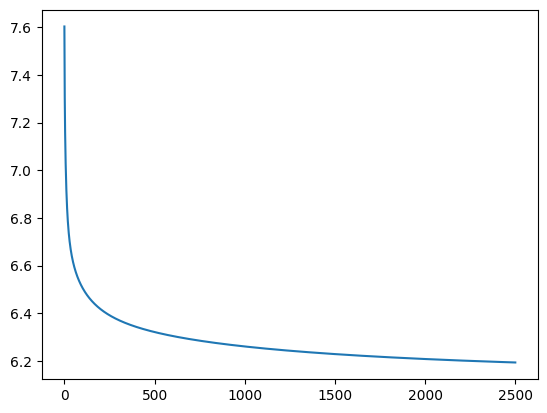

In [10]:
plt.plot(loss_history)

In [11]:
predict_type = np.argmax( predict_func(w,x), axis=0)

actual_type = np.argmax(t, axis=0)

difference = (predict_type != actual_type).sum()

print("错误数：",difference)
print("准确率： ",1 - difference/240)

错误数： 24
准确率：  0.9


In [ ]:
# 利用Mini-autograd训练2层前馈神经网络

from Mini_autograd import *

x = x[1:, :]


l1 = Linear(np.random.rand(4, 5))  # 一层维度 4 -> 4
h1 = Sigmoid()
l2 = Linear(np.random.rand(6, 5))  # 二层 4 -> 6
loss = Softmax_MCELoss()

myNN = NN(
    l1,
    h1,
    l2,
    loss,
)

In [ ]:
myNN.train(x,t,epoch=2500)

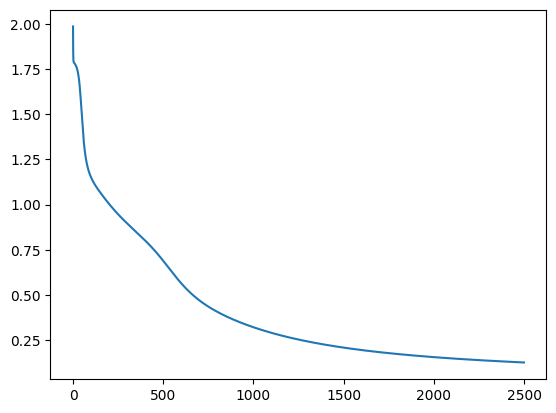

In [14]:
plt.plot(myNN.show_loss_history())

In [15]:
l1.forward(x)
output = loss.output_set

predict_type = np.argmax(output, axis=0)
actual_type = np.argmax(t, axis=0)

difference = (predict_type != actual_type).sum()
print("错误数：",difference)
print("准确率： ",1 - difference/240)

AttributeError: 'Softmax_MCELoss' object has no attribute 'output_set'